# Prodigy DataScience Internship 
##### Task 2 : Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.

# Importing necessary python libraries 

In [623]:
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt 

# Data loading and cleaning

In [624]:
df = pd.read_csv('enhanced_fever_medicine_recommendation.csv')
df.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [625]:
df.isna().sum()

Temperature                 0
Fever_Severity              0
Age                         0
Gender                      0
BMI                         0
Headache                    0
Body_Ache                   0
Fatigue                     0
Chronic_Conditions          0
Allergies                   0
Smoking_History             0
Alcohol_Consumption         0
Humidity                    0
AQI                         0
Physical_Activity           0
Diet_Type                   0
Heart_Rate                  0
Blood_Pressure              0
Previous_Medication       237
Recommended_Medication      0
dtype: int64

In [626]:
#Since there are null values only in 'Previous_Medication' column, we will drop those values when we will be considering tthe mentioned column in our analysis

In [627]:
df.duplicated().sum()

np.int64(0)

In [628]:
#Hence there is no need to drop the duplicates here

# Correlation between body temperature and fever severity

In this part of analysis, we will consider the two columns (Temperature, Fever_Severity) from the above data frame.

In [629]:
df_btfs = df.filter(items=['Temperature','Fever_Severity'])
df_btfs.head()

,Temperature,Fever_Severity
0,36.1,Normal
1,37.5,Mild Fever
2,36.4,Normal
3,39.8,High Fever
4,39.3,High Fever


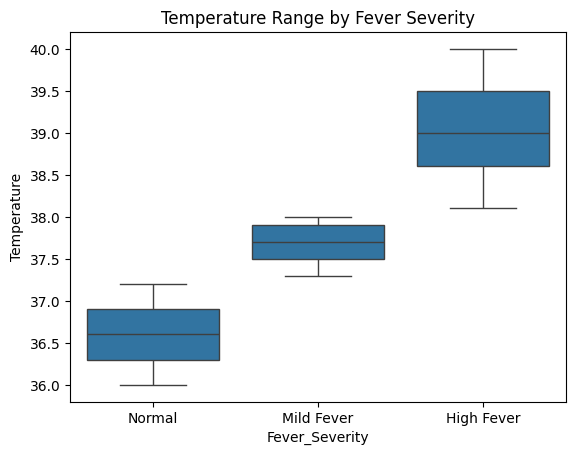

In [630]:
sn.boxplot(data=df_btfs, x='Fever_Severity', y='Temperature')
plt.title('Temperature Range by Fever Severity')
plt.show()


The above boxplot gives us the severity of fever and its corresponding body temperature range. We can also conclude from the above boxplot that the severity of fever is directly proportional to body temperature.

# Correlation between headache, bodyache and fever severity

In this part of analysis, we will consider three columns (Headache, Body_Ache, Fever_Severity) from the above data frame.

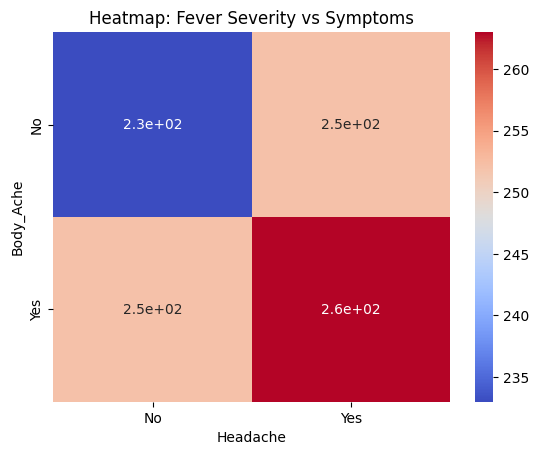

In [631]:
pt_hbs = df.pivot_table(index='Body_Ache', columns='Headache', values='Fever_Severity', aggfunc='count')

sn.heatmap(pt_hbs, annot=True, cmap='coolwarm')
plt.title('Heatmap: Fever Severity vs Symptoms')
plt.show()


The above heatmap tells us the severity of fever while considering if either or both headache and bodyache is experienced or not. Hence we can say from the above heat map that when both the bodyache and headache is experienced the severity of fever is more, when either of them is experienced then the severity of fever is mild and when none is experienced then the severity of fever is least.

# Correlation between Smoking history, Alcohol consumption and Fatigue

In this part of analysis, we will consider three columns (Smoking_History, Alcohol_Consumption, Fatigue) from the above data frame.

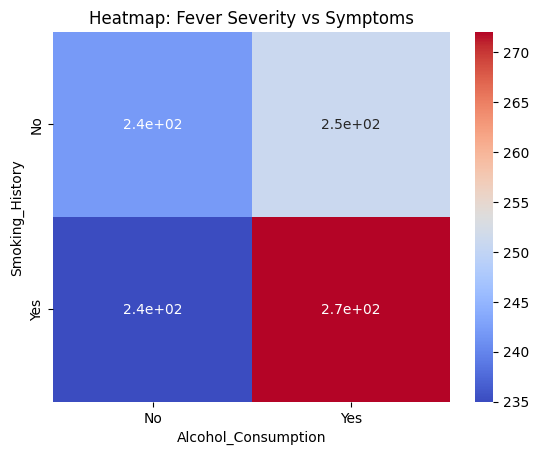

In [632]:
pt_hbs = df.pivot_table(index='Smoking_History', columns='Alcohol_Consumption', values='Fatigue', aggfunc='count')

sn.heatmap(pt_hbs, annot=True, cmap='coolwarm')
plt.title('Heatmap: Fever Severity vs Symptoms')
plt.show()

After going through the above heatmap, We can say that the people who are indulged in both Alcohol consumption as well as have a smoking history are the one with have the highest fatigue rates. But there is also a surprising observation in the above heatmap where the people who have smoking history but do not consume alcohol have lower fatigue rates than those who are not indulged in alcohol consumption as well as not having any smoking history. 

# Observation of trends when BMI and Heart Rate are considered

In this part of analysis, we will consider two columns (BMI, Heart_Rate) from the above data frame.

In [633]:
df_bh = df.filter(items=['BMI','Heart_Rate'])
display(df_bh)

,BMI,Heart_Rate
0,24.0,72
1,26.6,62
2,27.8,85
3,18.7,96
4,21.0,85
...,...,...
995,22.1,67
996,18.1,83
997,29.6,97
998,25.2,97


In [634]:
display(df_bh.duplicated())


0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [635]:
df_bh = df_bh.groupby(['BMI'])['Heart_Rate'].mean()
df_bh = df_bh.reset_index()
df_bh.head()

,BMI,Heart_Rate
0,18.0,70.00
1,18.1,85.75
2,18.2,82.50
3,18.3,80.50
4,18.4,83.00


<Axes: xlabel='BMI', ylabel='Heart_Rate'>

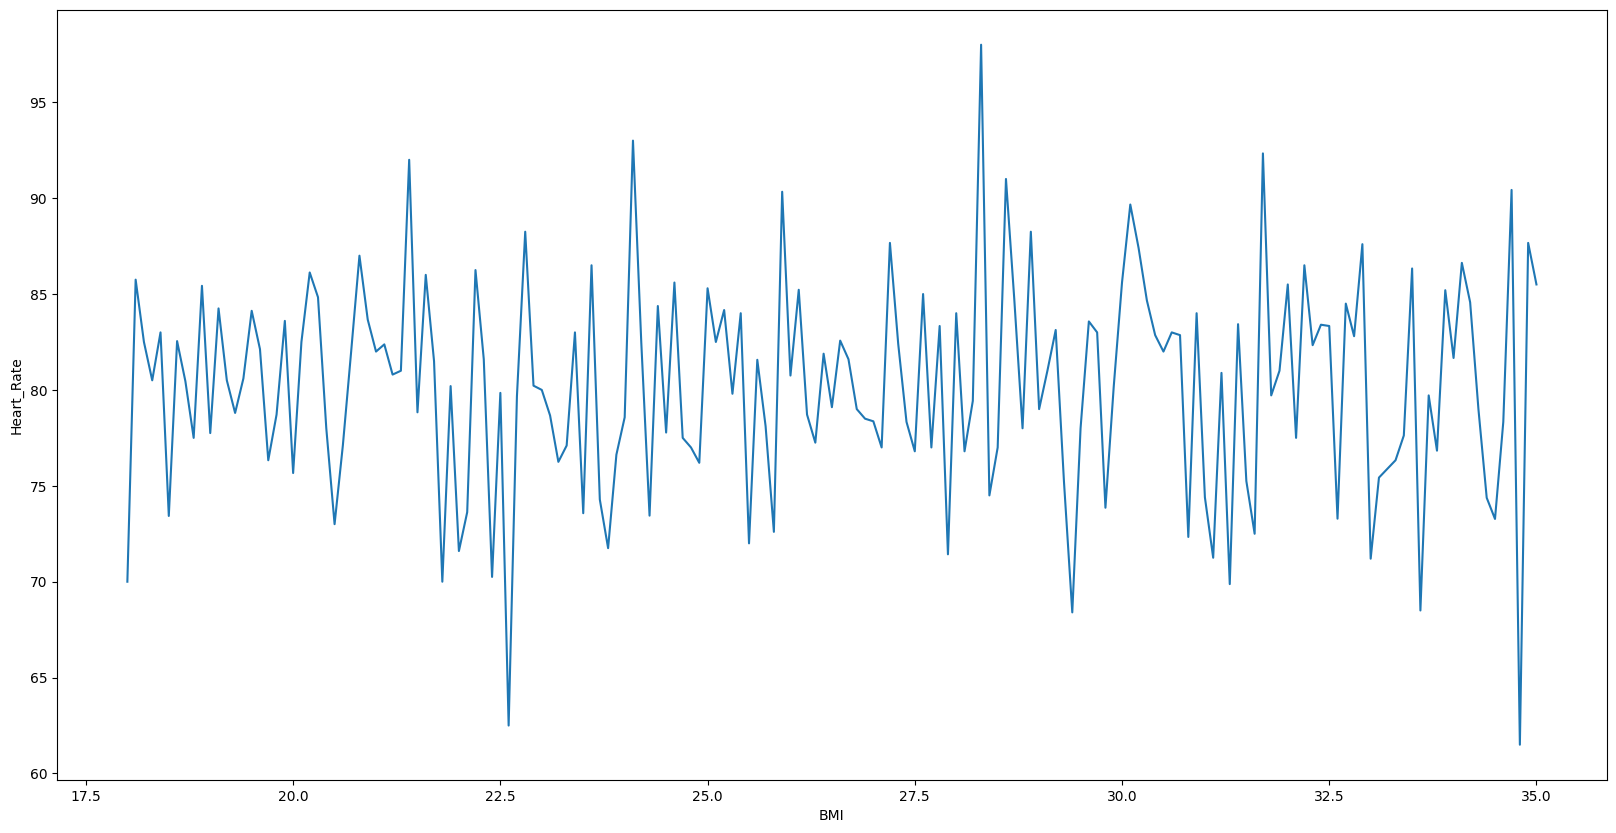

In [636]:
plt.figure(figsize=(20,10))
sn.lineplot(x='BMI', y='Heart_Rate', data=df_bh)

The lack of a monotonic trend suggests that a simple correlation (e.g., linear) between BMI and Heart Rate may not exist. The relationship could be more complex, or the observed trends might be due to external factors (age, gender, physical activity, etc.).

# Let's see if there is any correlation between age and heartrate

In this part of analysis, we will consider two columns (Age, Heart_Rate) from the above data frame.

In [637]:
df_ah = df.filter(items=['Age','Heart_Rate'])
df_ah.head()

,Age,Heart_Rate
0,89,72
1,94,62
2,92,85
3,66,96
4,28,85


In [638]:
display(df_ah.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999    False
Length: 1000, dtype: bool

In [639]:
df_ah = df_ah.groupby(['Age'])['Heart_Rate'].mean() 
df_ah = df_ah.reset_index()
df_ah.head()

,Age,Heart_Rate
0,1,78.500000
1,2,82.100000
2,3,74.500000
3,4,84.800000
4,5,75.181818


<Axes: xlabel='Age', ylabel='Heart_Rate'>

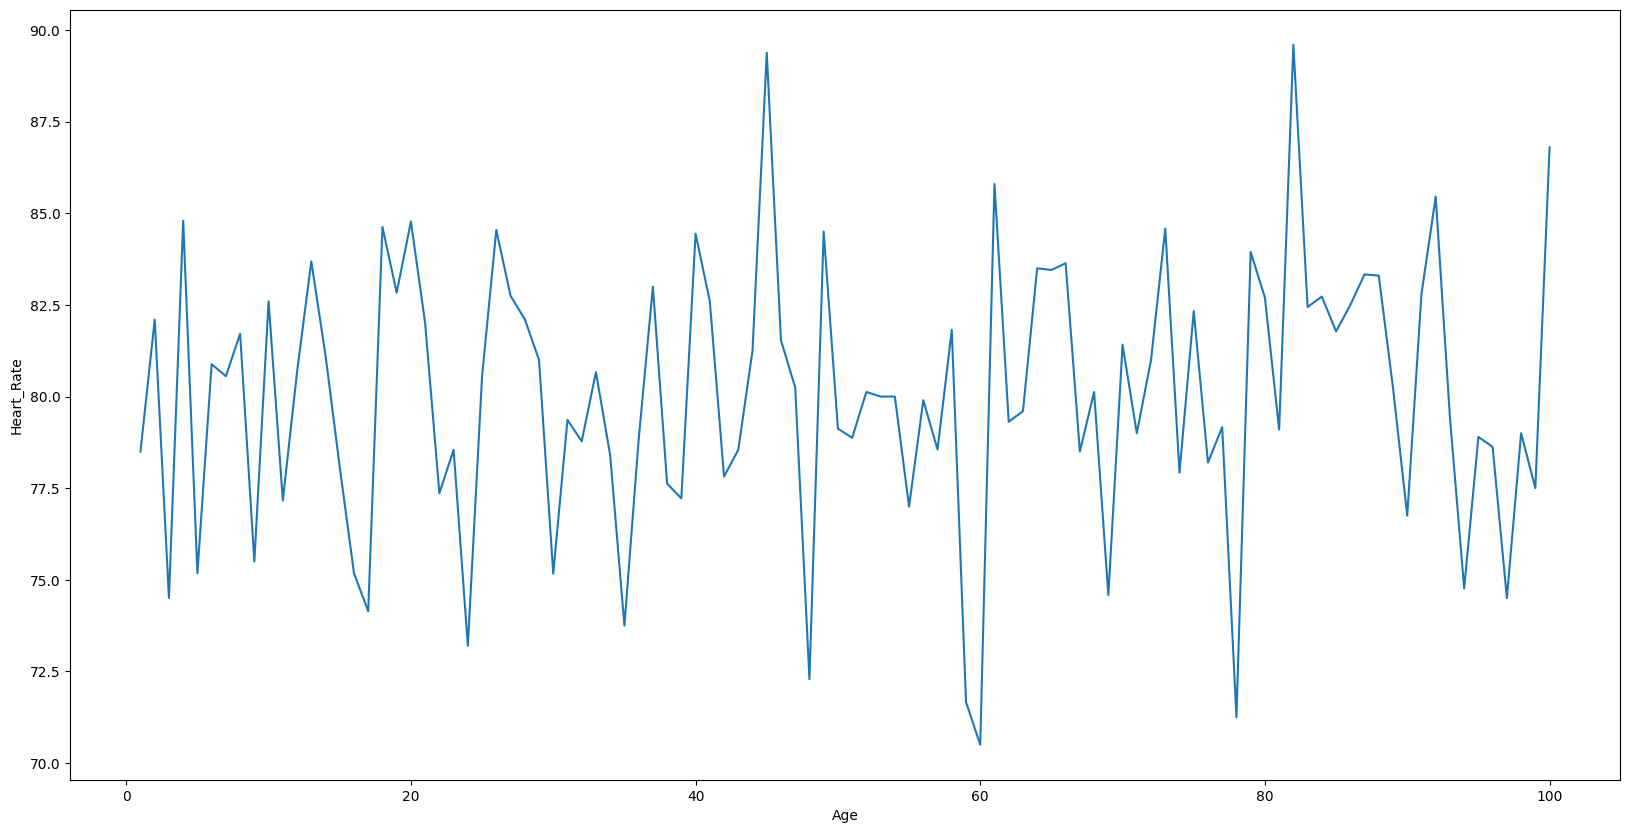

In [640]:
plt.figure(figsize=(20,10))
sn.lineplot(x='Age', y='Heart_Rate', data=df_ah)


Analysis of above graph :

Youth (0-20 years): There's a noticeable variability in heart rates, likely due to growth spurts, physical activity levels, and developmental changes.

Adulthood (20-60 years): The heart rate seems to stabilize somewhat but still shows fluctuations possibly due to lifestyle choices, fitness levels, and stress.

Older Age (60+ years): Increased variability again could be due to age-related health issues, changes in physical activity, and other health factors.

# Check if any correlation exists between AQI and fever severity

In this part of analysis, we will consider the two columns (AQI, Fever_Severity) from the above data frame.

In [641]:
df_af = df.filter(items=['Fever_Severity','AQI'])
df_af.head()

,Fever_Severity,AQI
0,Normal,430
1,Mild Fever,10
2,Normal,400
3,High Fever,438
4,High Fever,451


<Axes: xlabel='Fever_Severity', ylabel='AQI'>

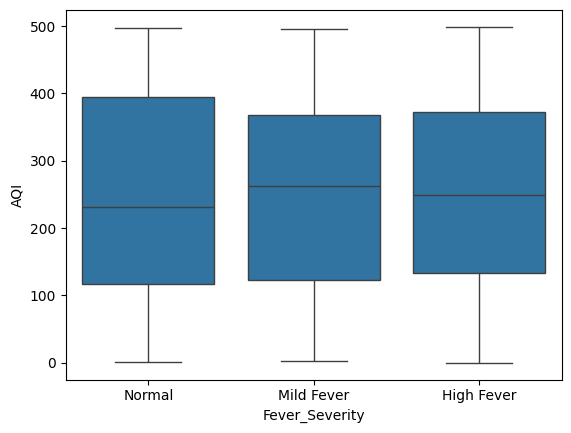

In [642]:
sn.boxplot(x='Fever_Severity', y='AQI', data = df_af)

In [643]:
#since thereare no outliers as observed in above boxplot, we will consider the mean of AQI for our further analysis
df_af = df_af.groupby(['Fever_Severity'])['AQI'].mean()
df_af = df_af.reset_index()
display(df_af)

,Fever_Severity,AQI
0,High Fever,251.883459
1,Mild Fever,246.889447
2,Normal,242.973978


From the above table, We can say that the severity of fever is directly proportional to AQI. AQI means Air quality index and AQI below 100 is said to be safe whereas in the above table it crosses the 200 mark which indicates that the air quality is hazardous hence resulting into High fever

# Analysis of previous medication and recommended medication

In this part of analysis, we will consider the two columns (Previous_Medication, Recommended_Medication) from the above data frame.

In [644]:
df_pr = df.filter(['Previous_Medication','Recommended_Medication'])
display(df_pr)

,Previous_Medication,Recommended_Medication
0,NaN,Ibuprofen
1,Ibuprofen,Paracetamol
2,NaN,Ibuprofen
3,Ibuprofen,Ibuprofen
4,Paracetamol,Ibuprofen
...,...,...
995,Ibuprofen,Ibuprofen
996,NaN,Ibuprofen
997,NaN,Ibuprofen
998,NaN,Ibuprofen


In [645]:
#Counting number of patients based on previous medication and recommended medication

combination_counts = df_pr.groupby(['Previous_Medication', 'Recommended_Medication'], dropna=False).size().reset_index(name='Count')
display(combination_counts)

,Previous_Medication,Recommended_Medication,Count
0,Aspirin,Ibuprofen,197
1,Aspirin,Paracetamol,51
2,Ibuprofen,Ibuprofen,198
3,Ibuprofen,Paracetamol,61
4,Paracetamol,Ibuprofen,218
5,Paracetamol,Paracetamol,38
6,NaN,Ibuprofen,188
7,NaN,Paracetamol,49


1. The above table shows us the number of patient who were recommended with other medicine than that of the one they were previously prescribed.
2. It also gives us the number of patients whose medicines were not changed indicating that the medical condition is still the same.
3. We can also observe that there is not even a single patient who was recommended with aspirin in his current visit. 
4. There are also some NaN values in Previous Medication column indicating the loss of data 

